In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import astropy as apy;
from planets import CandidateTable, PlanetTable;
from stars import StarTable;


Bad key text.latex.preview in file C:\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an updated matplotlibrc file 

In [13]:
# in scenarios where the quantity has its errorbars
# reported with it, useful to use this mask to get
# just the value
emsk = (slice(None), 0)

In [2]:
# load stellar data

star_table = StarTable(verbose=0)
star_table.loadTable('stars.tbl')
star_table.loadTable('sup_stars.tbl')


Text(0.5, 1.0, '850 Stars')

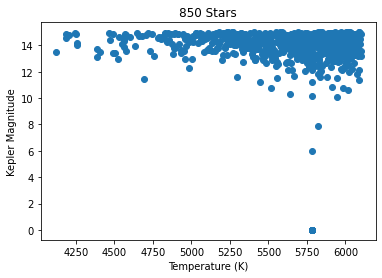

In [8]:
# make cuts
star_table.magCut()
star_table.loggCut()
star_table.tempCut()
temp = star_table.getMaskedData('temperature')
mag = star_table.getMaskedData('mag')
plt.scatter(temp[emsk], mag)
plt.ylabel('Kepler Magnitude')
plt.xlabel('Temperature (K)')
plt.title("%d Stars"%len(mag))

In [9]:
# load planetary data

pl_table = PlanetTable(verbose=0)
can_table = CandidateTable(verbose=0)

pl_table.loadTable('confirmed.tbl')
can_table.loadTable('candidate.tbl')




In [10]:
can_table.magCut()
can_table.periodCut()
can_table.loggCut()
can_table.radiusCut()
can_table.tempCut()

pl_table.magCut()
pl_table.loggCut()
pl_table.tempCut()
pl_table.periodCut()
pl_table.radiusCut()

In [11]:
plan_p = pl_table.getMaskedData('period')
cand_p = can_table.getMaskedData('period')
plan_r = pl_table.getMaskedData('radius')
cand_r = can_table.getMaskedData('radius')


Text(0.5, 0, 'period (days)')

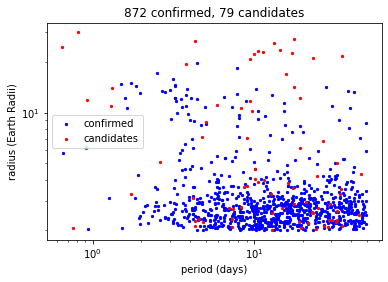

In [20]:
plt.scatter(plan_p[emsk], plan_r[emsk], color = 'blue', label = 'confirmed', s = 5)
plt.scatter(cand_p[emsk], cand_r[emsk], color = 'red', label = 'candidates', s = 5)
plt.legend()
plt.loglog()
plt.title('%d confirmed, %d candidates'%(len(plan_p), len(cand_p)))
plt.ylabel('radius (Earth Radii)')
plt.xlabel('period (days)')